## Lead score 


## Step 1: Importing and Data general overview

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
# import python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [27]:
# In order to see all cols in data lead
pd.set_option('display.max_columns', None)

In [28]:
# Read data leads.csv
lead = pd.read_csv("Leads.csv")
lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [29]:
# shape
lead.shape

(9240, 37)

In [30]:
# summary statistic of dataframe
lead.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [31]:
# check data type
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

About the dataset

. The data set contains 9240 rows and 37 columns.

. Prospect ID:  A unique ID with which the customer is identified.

. Converted: The target variable. Indicates whether a lead has been successfully converted or not.

. and 35 independence variables

. Data types: float64(4), int64(3), object(30)


## Step 2: EDA and Cleansing Data

### 2.1. Target  Analysis

The target variable in your dataset, which represents whether a lead has been successfully converted or not with 0 for "not converted" and 1 for "converted sucessfully," would be considered a categorical variable.


In [32]:
# Check unique value of target column
lead['Converted'].unique()

array([0, 1])

In [33]:
lead['Converted'].value_counts()

Converted
0    5679
1    3561
Name: count, dtype: int64

In [34]:
# change Converted into category
lead['Converted'] = lead['Converted'].astype('category')

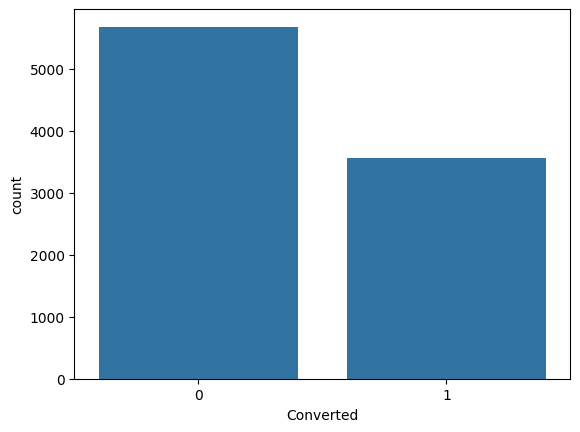

In [35]:
# Show the distribution of unique value in Converted by countplot
sns.countplot(x='Converted', data=lead)
plt.show()

In [36]:
# count numbers of each unique values for the target column
value_counts = lead['Converted'].value_counts()
percent = (value_counts/value_counts.sum())*100
print(percent)

Converted
0    61.461039
1    38.538961
Name: count, dtype: float64


## Converrted variable analysis 

.  Target var: should be category

.  There are 5679 customers with converted unsucessfully  with value 0 in target colnum and 3561  are  converted sucessfully with value 1. 

.   % customer can be converted sucessfully in data frame: 38.5% in this dataset

### 2.2 Missing value treatment

In [37]:
# finding missing data
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [38]:
# Check % missing value in each column 
round(lead.isnull().sum() / lead.shape[0] * 100.00,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [39]:
# Drop cols having missing values > 40% 
# columns_to_drop = ['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 
#                    'Asymmetrique Profile Score', 'Lead Quality']

# # Drop the specified columns
# lead = lead.drop(columns=columns_to_drop, errors='ignore')

In [40]:
lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call Converted  TotalVisits  \
0      Olark Chat           No          No         0          0.0   
1  Organic Search           No          No         0          5.0   
2  Direct Traffic           No          No         1          2.0   
3  Direct Traffic           No          No         0          1.0   
4          Google           No          No         1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                                No

In [41]:
# Replace missing values in 'TotalVisits' with the mean value
lead['TotalVisits'].fillna(lead['TotalVisits'].mean(), inplace=True)

# Replace missing values in 'Page Views Per Visit' with the mean
lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].mean(), inplace=True)

In [42]:
# Check unique value of some cols before making decision of treating missing values
lead['Country'].unique()

array([nan, 'India', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia'], dtype=object)

In [43]:
# Check unique value of some cols before making decision of treating missing values
lead['Specialization'].unique()

array(['Select', 'Business Administration', 'Media and Advertising', nan,
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [44]:
# Replace missing values in specified columns with "Other"
cols_to_replace1 = ['How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags']
lead[cols_to_replace1] = lead[cols_to_replace1].fillna('Other')

In [46]:
# Replace missing values in specified columns with "Select"
cols_to_replace2 = ['Lead Profile', 'City', 'Country','Specialization']
lead[cols_to_replace2] = lead[cols_to_replace2].fillna('Select')

In [50]:
lead['Asymmetrique Profile Score'].mean()

16.344882516925527

In [51]:
# Asymmetrique score
lead['Asymmetrique Profile Score'] = lead['Asymmetrique Profile Score'].fillna(lead['Asymmetrique Profile Score'].mean())
lead['Asymmetrique Activity Score'] = lead['Asymmetrique Activity Score'].fillna(lead['Asymmetrique Activity Score'].mean())

In [52]:
# Check % missing value in each column 
round(lead.isnull().sum() / lead.shape[0] * 100.00,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
How did you hear about X Education                0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper 

### There is no missing value in data lead now

In [53]:
# Check duplicated rows in df
lead[lead.duplicated()]

Empty DataFrame
Columns: [Prospect ID, Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Country, Specialization, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Tags, Lead Quality, Update me on Supply Chain Content, Get updates on DM Content, Lead Profile, City, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score, I agree to pay the amount through cheque, A free copy of Mastering The Interview, Last Notable Activity]
Index: []

### 2.3 Check outliers

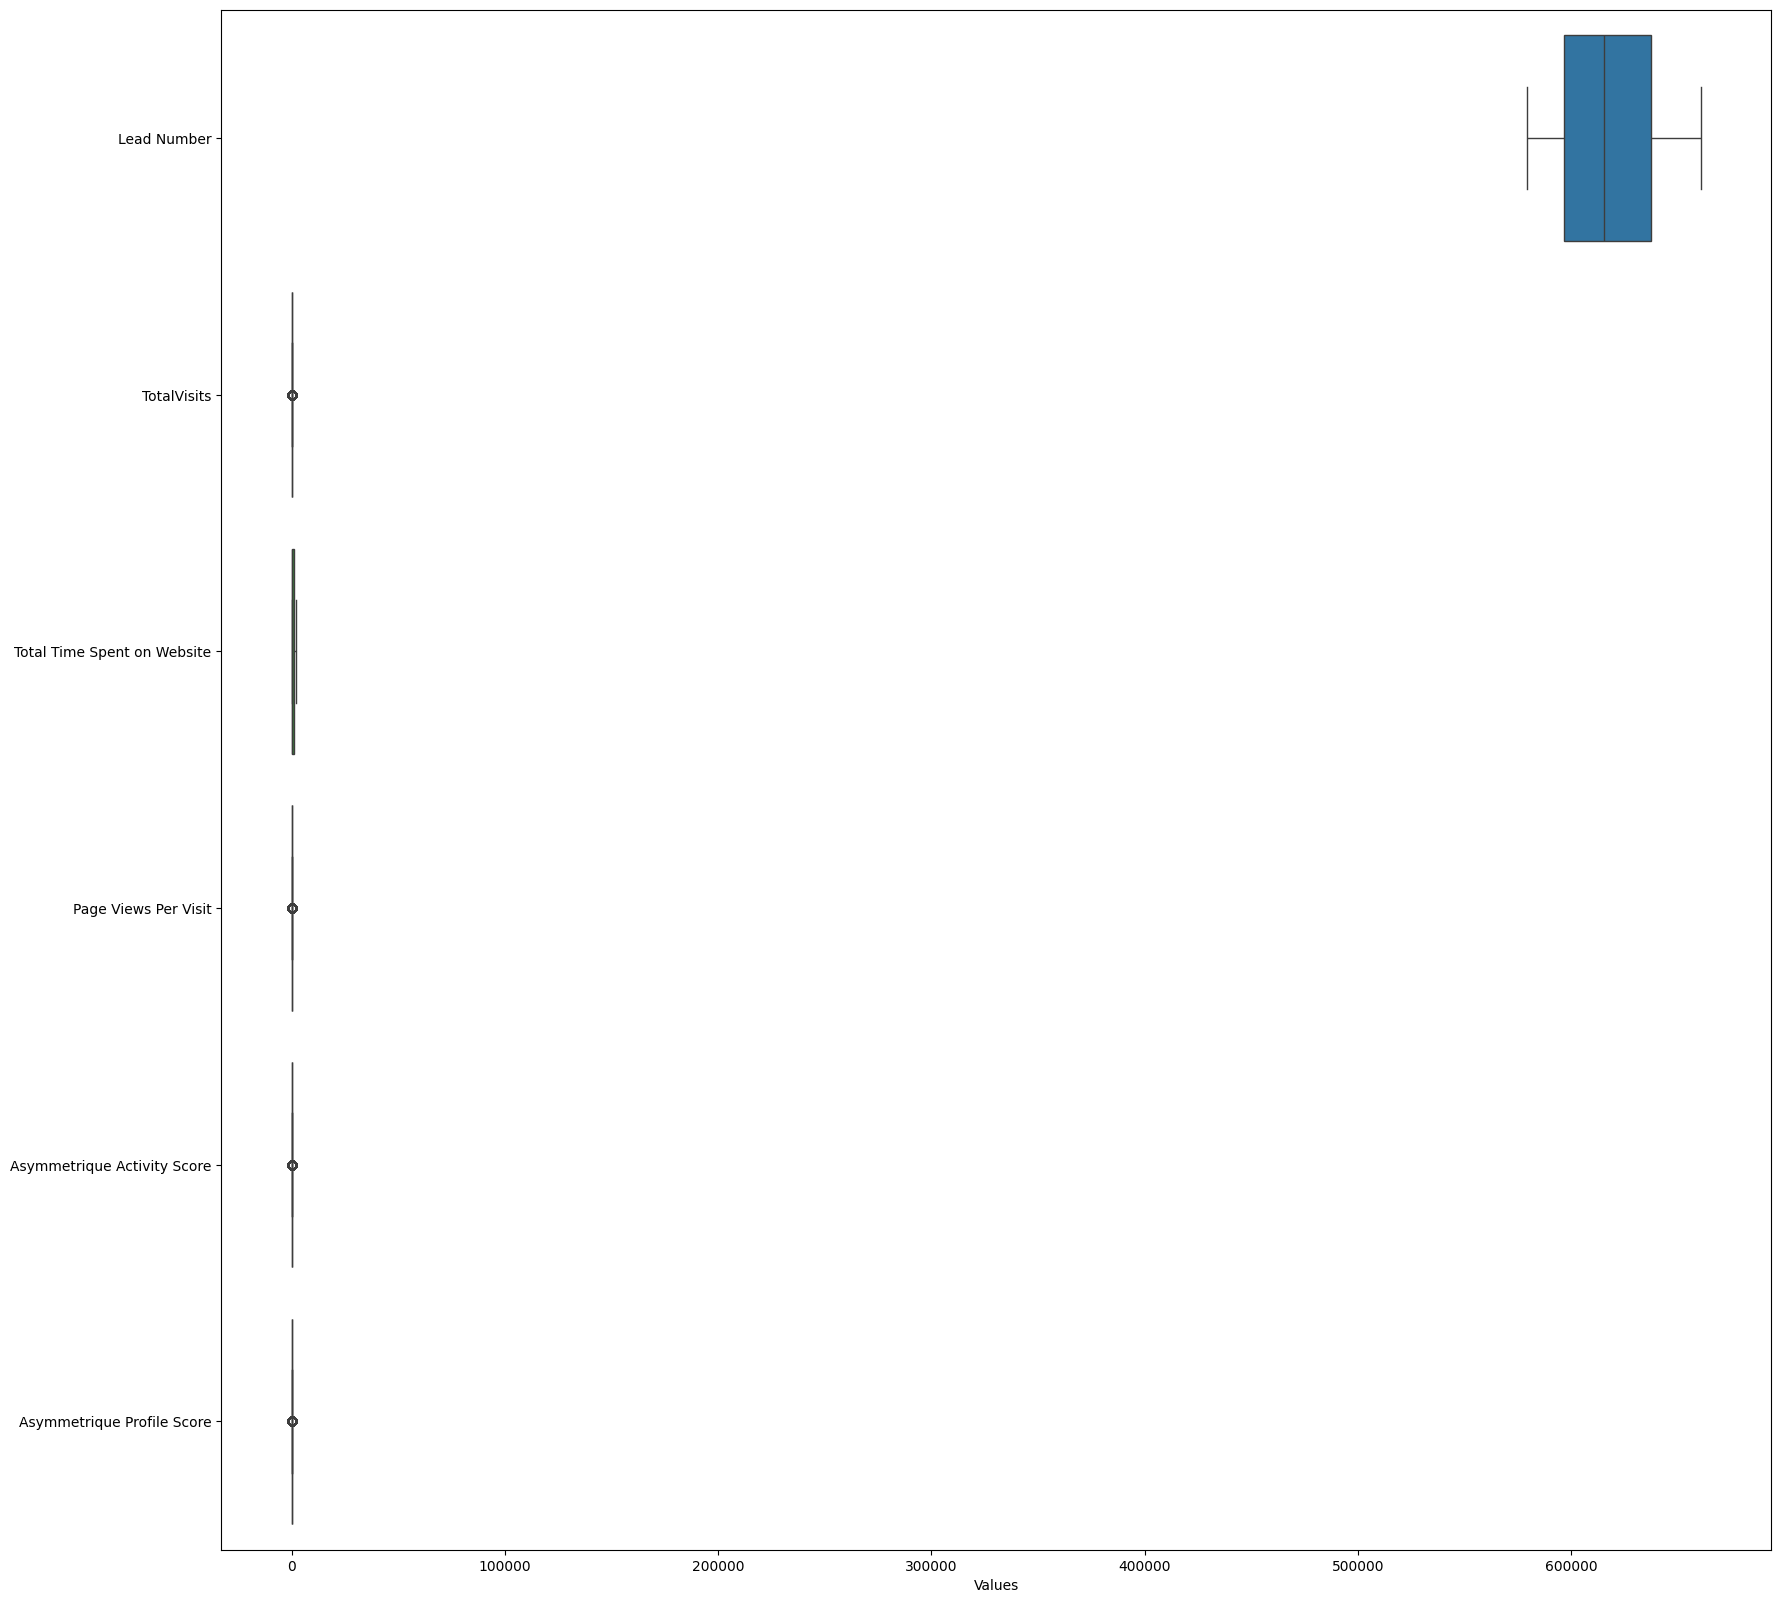

In [54]:
# select only numeric culumns fỏ correlation matrix
numeric_cols = lead.select_dtypes(include=['number'])
#Check outlier by boxplot
plt.figure(figsize=(20,20))
sns.boxplot(data=numeric_cols, orient="h")
#plt.title("Boxplot of Numerical Variables")
plt.xlabel("Values")
plt.show()

(array([1099., 1118., 1033.,  998.,  834.,  831.,  898.,  938.,  735.,
         756.]),
 array([579533. , 587653.4, 595773.8, 603894.2, 612014.6, 620135. ,
        628255.4, 636375.8, 644496.2, 652616.6, 660737. ]),
 <BarContainer object of 10 artists>)

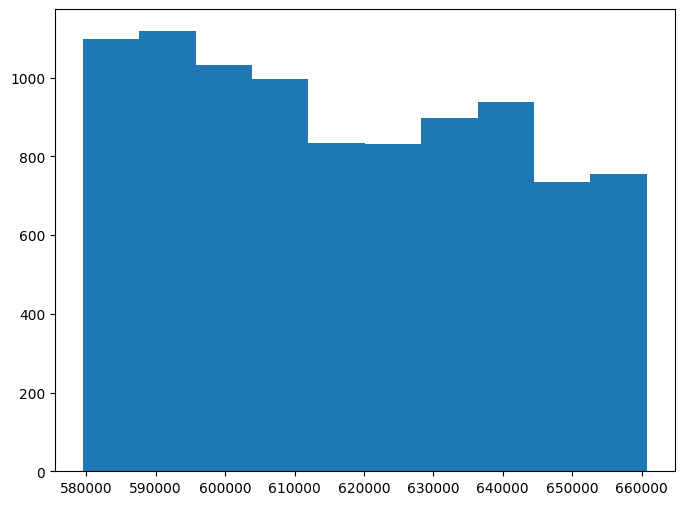

In [55]:
# hist for some num col having outliers
plt.figure(figsize=(8, 6))
plt.hist(lead['Lead Number'])

(array([4413., 1518.,  477.,  460.,  686.,  713.,  573.,  292.,   89.,
          19.]),
 array([   0. ,  227.2,  454.4,  681.6,  908.8, 1136. , 1363.2, 1590.4,
        1817.6, 2044.8, 2272. ]),
 <BarContainer object of 10 artists>)

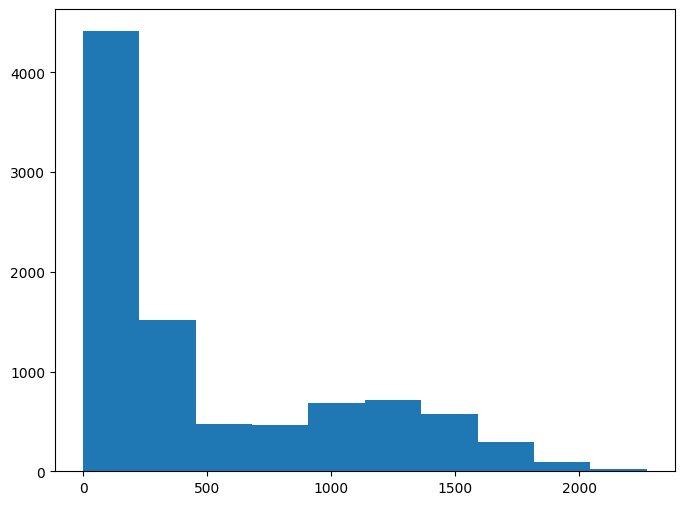

In [56]:
# hist for some num col having outliers
plt.figure(figsize=(8, 6))
plt.hist(lead['Total Time Spent on Website'])

#### There is not much outliers for numeric cols in this dataframe lead

In [57]:
lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call Converted  TotalVisits  \
0      Olark Chat           No          No         0          0.0   
1  Organic Search           No          No         0          5.0   
2  Direct Traffic           No          No         1          2.0   
3  Direct Traffic           No          No         0          1.0   
4          Google           No          No         1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0  Select                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                                No

## Step 3: Data preparation

#### Transform binary variables by one hot endcoding(Yes/No thành 0/1)

In [58]:
# Get list of category and numeric attributes 
numeric_attr = lead.select_dtypes(exclude='object').columns
cate_attr = lead.select_dtypes(include='object').columns
# Remove Prospect ID from cate_attr
cate_attr=cate_attr[1:]

In [59]:
# Write small function to get basic information about numer of value, missing value and distribution
pd.set_option('display.max_colwidth', 400) # Để nhìn rõ hơn
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def num_values(df):
    return df.nunique()
def value_ratios(c):
    return dict((c.value_counts(normalize=True) * 100).round(1))

info = lead[cate_attr].agg([missing_ratio, num_values, value_ratios])
info

Lead Origin  \
missing_ratio                                                                                                              0.0   
num_values                                                                                                                   5   
value_ratios   {'Landing Page Submission': 52.9, 'API': 38.7, 'Lead Add Form': 7.8, 'Lead Import': 0.6, 'Quick Add Form': 0.0}   

                                                                                                                                                                                                                                                                                                                                                                                                                   Lead Source  \
missing_ratio                                                                                                                                                                                                                                                                                                                                                                                                              0.4   
num_values                                                                                                                                                                                                                                                                                                                                                                                                                  21   
value_ratios   {'Google': 31.2, 'Direct Traffic': 27.6, 'Olark Chat': 19.1, 'Organic Search': 12.5, 'Reference': 5.8, 'Welingak Website': 1.5, 'Referral Sites': 1.4, 'Facebook': 0.6, 'bing': 0.1, 'google': 0.1, 'Click2call': 0.0, 'Press_Release': 0.0, 'Social Media': 0.0, 'Live Chat': 0.0, 'youtubechannel': 0.0, 'testone': 0.0, 'Pay per Click Ads': 0.0, 'welearnblog_Home': 0.0, 'WeLearn': 0.0, 'blog': 0.0, '...   

                           Do Not Email                Do Not Call  \
missing_ratio                       0.0                        0.0   
num_values                            2                          2   
value_ratios   {'No': 92.1, 'Yes': 7.9}  {'No': 100.0, 'Yes': 0.0}   

                                                                                                                                                                                                                                                                                                                                                                                                                 Last Activity  \
missing_ratio                                                                                                                                                                                                                                                                                                                                                                                                              1.1   
num_values                                                                                                                                                                                                                                                                                                                                                                                                                  17   
value_ratios   {'Email Opened': 37.6, 'SMS Sent': 30.0, 'Olark Chat Conversation': 10.6, 'Page Visited on Website': 7.0, 'Converted to Lead': 4.7, 'Email Bounced': 3.6, 'Email Link Clicked': 2.9, 'Form Submitted on Website': 1.3, 'Unreachable': 1.0, 'Unsubscribed': 0.7, 'Had a Phone Conversation': 0.3, 'Approached upfront': 0.1, 'View in browser link Clicked': 0.1, 'Email Received': 

In [60]:
# Get columns with only one value to remove since they donot have meaning to the model 
drop_cols = info.loc[:, info.loc['num_values']==1].columns.to_list()

In [61]:
# We also remove columns with 2 values but one of them play most contribution to columns. For instance, Search have 2 value Yes and No, but Yes only count less then 2% that is not meaningfull to model

drop_cols.extend(['Do Not Call','What matters most to you in choosing a course', 'Search', 'Newspaper Article', \
                  'X Education Forums','Newspaper', 'Digital Advertisement', 'Through Recommendations'])

In [62]:
# Moreover, you can see 'Asymmetrique Activity Index','Asymmetrique Profile Index' have them same meaning with 'Asymmetrique Activity Score','Asymmetrique Profile Score' so 
# we can remove one group of them. In this part, we remove the index group
drop_cols.extend(['Asymmetrique Activity Index','Asymmetrique Profile Index'])

In [63]:
# Now, below are the columns we need to frop first
drop_cols

['Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Do Not Call',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index']

In [64]:
lead.drop(columns = drop_cols, inplace=True)

In [65]:
# Check the category remaining in dataset
cate_attr_1 = ['Lead Source', 'What is your current occupation', 'Country',
       'Last Notable Activity', 'Specialization',
       'How did you hear about X Education', 'Do Not Email', 'Last Activity',
       'City', 'Lead Profile', 'Lead Origin',
       'A free copy of Mastering The Interview', 'Tags', 'Lead Quality']

In [66]:
# Check basic information again

info_1 = lead[cate_attr_1].agg([missing_ratio, num_values, value_ratios])
info_1

Lead Source  \
missing_ratio                                                                                                                                                                                                                                                                                                                                                                                                              0.4   
num_values                                                                                                                                                                                                                                                                                                                                                                                                                  21   
value_ratios   {'Google': 31.2, 'Direct Traffic': 27.6, 'Olark Chat': 19.1, 'Organic Search': 12.5, 'Reference': 5.8, 'Welingak Website': 1.5, 'Referral Sites': 1.4, 'Facebook': 0.6, 'bing': 0.1, 'google': 0.1, 'Click2call': 0.0, 'Press_Release': 0.0, 'Social Media': 0.0, 'Live Chat': 0.0, 'youtubechannel': 0.0, 'testone': 0.0, 'Pay per Click Ads': 0.0, 'welearnblog_Home': 0.0, 'WeLearn': 0.0, 'blog': 0.0, '...   

                                                                                                      What is your current occupation  \
missing_ratio                                                                                                                     0.0   
num_values                                                                                                                          6   
value_ratios   {'Unemployed': 60.6, 'Other': 29.3, 'Working Professional': 7.6, 'Student': 2.3, 'Housewife': 0.1, 'Businessman': 0.1}   

                                                                                                                                                                                                                                                                                                                                                                                                                       Country  \
missing_ratio                                                                                                                                                                                                                                                                                                                                                                                                              0.0   
num_values                                                                                                                                                                                                                                                                                                                                                                                                                  39   
value_ratios   {'India': 70.3, 'Select': 26.6, 'United States': 0.7, 'United Arab Emirates': 0.6, 'Singapore': 0.3, 'Saudi Arabia': 0.2, 'United Kingdom': 0.2, 'Australia': 0.1, 'Qatar': 0.1, 'Bahrain': 0.1, 'Hong Kong': 0.1, 'Oman': 0.1, 'France': 0.1, 'unknown': 0.1, 'Kuwait': 0.0, 'South Africa': 0.0, 'Canada': 0.0, 'Nigeria': 0.0, 'Germany': 0.0, 'Sweden': 0.0, 'Philippines': 0.0, 'Uganda': 0.0, 'Italy':...   

                                                                                                                                                                                                                                                                                                                                                                                                         Last Notable Activity  \
missing_ratio                                                                             

As you can see, in lead quality, there are still missing. It could be 'Might be', 'Not Sure',  'High in Relevance', 'Worst', 'Low in Relevance'. Base on practical experience, this attribute could play an important role in decision. So, the missing value could be filled with 'Other'. The unselect values are aslo able to be 'Other'

In [67]:
lead[cate_attr_1] = lead[cate_attr_1].replace(np.nan, 'Other')
lead[cate_attr_1] =lead[cate_attr_1].replace('Select', 'Other')
lead[cate_attr_1].head()

Lead Source What is your current occupation Country  \
0      Olark Chat                      Unemployed   Other   
1  Organic Search                      Unemployed   India   
2  Direct Traffic                         Student   India   
3  Direct Traffic                      Unemployed   India   
4          Google                      Unemployed   India   

  Last Notable Activity           Specialization  \
0              Modified                    Other   
1          Email Opened                    Other   
2          Email Opened  Business Administration   
3              Modified    Media and Advertising   
4              Modified                    Other   

  How did you hear about X Education Do Not Email            Last Activity  \
0                              Other           No  Page Visited on Website   
1                              Other           No             Email Opened   
2                              Other           No             Email Opened   
3                      Word Of Mouth           No              Unreachable   
4                              Other           No        Converted to Lead   

     City    Lead Profile              Lead Origin  \
0   Other           Other                      API   
1   Other           Other                      API   
2  Mumbai  Potential Lead  Landing Page Submission   
3  Mumbai           Other  Landing Page Submission   
4  Mumbai           Other  Landing Page Submission   

  A free copy of Mastering The Interview                                 Tags  \
0                                     No          Interested in other courses   
1                                     No                              Ringing   
2                                    Yes  Will revert after reading the email   
3                                     No                              Ringing   
4                                     No  Will revert after reading the email   

       Lead Quality  
0  Low in Relevance  
1             Other  
2          Might be  
3          Not Sure  
4          Might be

In [68]:
# Check again to make sure there are no missing value
lead[cate_attr_1].agg([missing_ratio, num_values, value_ratios])

Lead Source  \
missing_ratio                                                                                                                                                                                                                                                                                                                                                                                                              0.0   
num_values                                                                                                                                                                                                                                                                                                                                                                                                                  22   
value_ratios   {'Google': 31.0, 'Direct Traffic': 27.5, 'Olark Chat': 19.0, 'Organic Search': 12.5, 'Reference': 5.8, 'Welingak Website': 1.5, 'Referral Sites': 1.4, 'Facebook': 0.6, 'Other': 0.4, 'bing': 0.1, 'google': 0.1, 'Click2call': 0.0, 'Press_Release': 0.0, 'Social Media': 0.0, 'Live Chat': 0.0, 'youtubechannel': 0.0, 'testone': 0.0, 'Pay per Click Ads': 0.0, 'welearnblog_Home': 0.0, 'WeLearn': 0.0, ...   

                                                                                                      What is your current occupation  \
missing_ratio                                                                                                                     0.0   
num_values                                                                                                                          6   
value_ratios   {'Unemployed': 60.6, 'Other': 29.3, 'Working Professional': 7.6, 'Student': 2.3, 'Housewife': 0.1, 'Businessman': 0.1}   

                                                                                                                                                                                                                                                                                                                                                                                                                       Country  \
missing_ratio                                                                                                                                                                                                                                                                                                                                                                                                              0.0   
num_values                                                                                                                                                                                                                                                                                                                                                                                                                  39   
value_ratios   {'India': 70.3, 'Other': 26.6, 'United States': 0.7, 'United Arab Emirates': 0.6, 'Singapore': 0.3, 'Saudi Arabia': 0.2, 'United Kingdom': 0.2, 'Australia': 0.1, 'Qatar': 0.1, 'Bahrain': 0.1, 'Hong Kong': 0.1, 'Oman': 0.1, 'France': 0.1, 'unknown': 0.1, 'Kuwait': 0.0, 'South Africa': 0.0, 'Canada': 0.0, 'Nigeria': 0.0, 'Germany': 0.0, 'Sweden': 0.0, 'Philippines': 0.0, 'Uganda': 0.0, 'Italy': ...   

                                                                                                                                                                                                                                                                                                                                                                                                         Last Notable Activity  \
missing_ratio                                                                             

#### Get 5 top popular values in category attributes

#### Add you can see, there are too many values with insignificant distribution that result to meaningless dummy atrributes. We can deal with this in the simplest way: if the value is not in top k popularity, move it in to 'Other' group

##### This function below help to keep top k popular values and merge other to one group

In [69]:
def top_titles(Sr, top=5):
    value_counts = Sr.value_counts(normalize=True)
    top_titles = value_counts[:min(top, len(Sr))].index.to_list()

    New_Sr = pd.Series([x if x in top_titles else 'Other' for x in Sr])

    return New_Sr
# Check with conlum Country
lead['Lead Source'].agg(top_titles).value_counts(normalize=True)*100


Google            31.038961
Direct Traffic    27.521645
Olark Chat        18.993506
Organic Search    12.489177
Reference          5.779221
Other              4.177489
Name: proportion, dtype: float64

In [70]:
# Apply for all category columns
lead[cate_attr_1] = lead[cate_attr_1].agg(top_titles)

In [71]:
# Check distribution again
lead[cate_attr_1].agg([missing_ratio, num_values, value_ratios])

Lead Source  \
missing_ratio                                                                                                                   0.0   
num_values                                                                                                                        6   
value_ratios   {'Google': 31.0, 'Direct Traffic': 27.5, 'Olark Chat': 19.0, 'Organic Search': 12.5, 'Reference': 5.8, 'Other': 4.2}   

                                                                                  What is your current occupation  \
missing_ratio                                                                                                 0.0   
num_values                                                                                                      5   
value_ratios   {'Unemployed': 60.6, 'Other': 29.4, 'Working Professional': 7.6, 'Student': 2.3, 'Housewife': 0.1}   

                                                                                                           Country  \
missing_ratio                                                                                                  0.0   
num_values                                                                                                       5   
value_ratios   {'India': 70.3, 'Other': 28.2, 'United States': 0.7, 'United Arab Emirates': 0.6, 'Singapore': 0.3}   

                                                                                                                                  Last Notable Activity  \
missing_ratio                                                                                                                                       0.0   
num_values                                                                                                                                            6   
value_ratios   {'Modified': 36.9, 'Email Opened': 30.6, 'SMS Sent': 23.5, 'Other': 3.6, 'Page Visited on Website': 3.4, 'Olark Chat Conversation': 2.0}   

                                                                                                                                         Specialization  \
missing_ratio                                                                                                                                       0.0   
num_values                                                                                                                                            5   
value_ratios   {'Other': 65.7, 'Finance Management': 10.6, 'Human Resource Management': 9.2, 'Marketing Management': 9.1, 'Operations Management': 5.4}   

                                                                                               How did you hear about X Education  \
missing_ratio                                                                                                                 0.0   
num_values                                                                                                                      5   
value_ratios   {'Other': 82.5, 'Online Search': 8.7, 'Word Of Mouth': 3.8, 'Student of SomeSchool': 3.4, 'Multiple Sources': 1.6}   

                           Do Not Email  \
missing_ratio                       0.0   
num_values                            2   
value_ratios   {'No': 92.1, 'Yes': 7.9}   

                                                                                                                                                    Last Activity  \
missing_ratio                                                                                                                                                 0.0   
num_values                                                                                                                                                      6   
value_ratios   {'Email Opened': 37.2, 'SMS Sent': 29.7, 'Other': 11.0, 'Olark Chat Conversation': 10.5, 'Page Visited on Website': 6.9, 'Converted to Lead': 4.6}   

                            

In [72]:
lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Converted  TotalVisits  \
0      Olark Chat           No         0          0.0   
1  Organic Search           No         0          5.0   
2  Direct Traffic           No         1          2.0   
3  Direct Traffic           No         0          1.0   
4          Google           No         1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0                    Other   
4                         1428                   1.0        Converted to Lead   

  Country Specialization How did you hear about X Education  \
0   Other          Other                              Other   
1   India          Other                              Other   
2   India          Other                              Other   
3   India          Other                      Word Of Mouth   
4   India          Other                              Other   

  What is your current occupation                                 Tags  \
0                      Unemployed          Interested in other courses   
1                      Unemployed                              Ringing   
2                         Student  Will revert after reading the email   
3                      Unemployed                              Ringing   
4                      Unemployed  Will revert after reading the email   

  Lead Quality    Lead Profile    City  Asymmetrique Activity Score  \
0        Other           Other   Other                         15.0   
1        Other           Other   Other                         15.0   
2     Might be  Potential Lead  Mumbai                         14.0   
3     Not Sure           Other  Mumbai                         13.0   
4     Might be           Other  Mumbai                         15.0   

   Asymmetrique Profile Score A free copy of Mastering The Interview  \
0                        15.0                                     No   
1                        15.0                                     No   
2                        20.0                                    Yes   
3                        17.0                                     No   
4                        18.0                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

#### With binary value columns, change it to 0 and 1

In [73]:
# Based ion table basic information, get columns with 2 values Yes and No: 'Do Not Email' and 'A free copy of Mastering The Interview'
binary_cols = ['Do Not Email', 'A free copy of Mastering The Interview']

In [74]:
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

# Mapping as expect
lead[binary_cols ] = lead[binary_cols].apply(binary_map, axis=0)

#### Transform  remaining category variables into numeric by dummies

In [75]:
cate_attr_2 = ['Tags', 'Last Activity', 'Lead Source', 'Lead Origin', 'City',
       'What is your current occupation', 'Lead Quality',
       'Last Notable Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'Lead Profile']

In [76]:
dummy = pd.get_dummies(lead[cate_attr_2], drop_first=True, dtype=int)
dummy

Tags_Interested in other courses  Tags_Other  Tags_Ringing  \
0                                    1           0             0   
1                                    0           0             1   
2                                    0           0             0   
3                                    0           0             1   
4                                    0           0             0   
...                                ...         ...           ...   
9235                                 0           0             0   
9236                                 0           1             0   
9237                                 0           1             0   
9238                                 0           1             0   
9239                                 0           0             0   

      Tags_Will revert after reading the email  Last Activity_Email Opened  \
0                                            0                           0   
1                                            0                           1   
2                                            1                           1   
3                                            0                           0   
4                                            1                           0   
...                                        ...                         ...   
9235                                         1                           0   
9236                                         0                           0   
9237                                         0                           0   
9238                                         0                           0   
9239                                         1                           0   

      Last Activity_Olark Chat Conversation  Last Activity_Other  \
0                                         0                    0   
1                                         0                    0   
2                                         0                    0   
3                                         0                    1   
4                                         0                    0   
...                                     ...                  ...   
9235                                      0                    1   
9236                                      0                    0   
9237                                      0                    0   
9238                                      0                    0   
9239                                      0                    0   

      Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                         1                       0   
1                                         0                       0   
2                                         0                       0   
3                                         0                       0   
4                                         0                       0   
...                                     ...                     ...   
9235                                      0                       0   
9236                                      0                       1   
9237                                      0                       1   
9238                                      0                       1   
9239                                      0                       1   

      Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                      0                       1                           0   
1                      0                       0                           1   
2                      0                       0                           0   
3                      0                       0                           0   
4                      1                       0                           0   
...                  ...                     ...                         ...   
9235                  

In [79]:
# Get numeeic subset 
numeric_attr_1 = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Score','Asymmetrique Profile Score']

In [78]:
X_df = pd.concat([dummy, lead[numeric_attr_1]], axis=1)
X_df.head()

Tags_Interested in other courses  Tags_Other  Tags_Ringing  \
0                                 1           0             0   
1                                 0           0             1   
2                                 0           0             0   
3                                 0           0             1   
4                                 0           0             0   

   Tags_Will revert after reading the email  Last Activity_Email Opened  \
0                                         0                           0   
1                                         0                           1   
2                                         1                           1   
3                                         0                           0   
4                                         1                           0   

   Last Activity_Olark Chat Conversation  Last Activity_Other  \
0                                      0                    0   
1                                      0                    0   
2                                      0                    0   
3                                      0                    1   
4                                      0                    0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Other  Lead Source_Reference  \
0                  0                      0   
1                  0                      0   
2                  0                      0   
3                  0                      0   
4                  0                      0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  City_Other  \
0                        0                           0           1   
1                        0                           0           1   
2                        0                           0           0   
3                        0                           0           0   
4                        0                           0           0   

   City_Other Cities  City_Other Cities of Maharashtra  \
0                  0                                 0   
1                  0                                 0   
2                  0                                 0   
3                  0                                 0   
4                  0                                 0   

   City_Thane & Outskirts  What is your current occupation_Other  \
0                       0                                      0   
1                       0                                      0   
2                       0                                      0   
3                       0                                      0   
4                       0                                      0   

   What is your curre

In [80]:
# Check percentile of dataset
X_df.describe()

Tags_Interested in other courses   Tags_Other  Tags_Ringing  \
count                       9240.000000  9240.000000   9240.000000   
mean                           0.055519     0.539719      0.130195   
std                            0.229004     0.498447      0.336536   
min                            0.000000     0.000000      0.000000   
25%                            0.000000     0.000000      0.000000   
50%                            0.000000     1.000000      0.000000   
75%                            0.000000     1.000000      0.000000   
max                            1.000000     1.000000      1.000000   

       Tags_Will revert after reading the email  Last Activity_Email Opened  \
count                               9240.000000                 9240.000000   
mean                                   0.224242                    0.371970   
std                                    0.417105                    0.483357   
min                                    0.000000                    0.000000   
25%                                    0.000000                    0.000000   
50%                                    0.000000                    0.000000   
75%                                    0.000000                    1.000000   
max                                    1.000000                    1.000000   

       Last Activity_Olark Chat Conversation  Last Activity_Other  \
count                            9240.000000          9240.000000   
mean                                0.105303             0.110065   
std                                 0.306960             0.312988   
min                                 0.000000             0.000000   
25%                                 0.000000             0.000000   
50%                                 0.000000             0.000000   
75%                                 0.000000             0.000000   
max                                 1.000000             1.000000   

       Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
count                            9240.000000             9240.000000   
mean                                0.069264                0.297078   
std                                 0.253916                0.456996   
min                                 0.000000                0.000000   
25%                                 0.000000                0.000000   
50%                                 0.000000                0.000000   
75%                                 0.000000                1.000000   
max                                 1.000000                1.000000   

       Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
count         9240.000000             9240.000000                 9240.000000   
mean             0.310390                0.189935                    0.124892   
std              0.462678                0.392271                    0.330614   
min              0.000000                0.000000                    0.000000   
25%              0.000000                0.000000                    0.000000   
50%              0.000000                0.000000                    0.000000   
75%              1.000000                0.000000                    0.000000   
max              1.000000                1.000000                    1.000000   

       Lead Source_Other  Lead Source_Reference  \
count        9240.000000            9240.000000   
mean            0.041775               0.057792   
std             0.200085               0.233363   
min             0.000000               0.000000   
25%             0.000000               0.000000   
50%             0.000000               0.000000   
75%             0.000000               0.000000   
max             1.000000               1.000000   

       Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
count                          9240.000000                9240.000000   
mean                              0.528788               

In [81]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 56 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Tags_Interested in other courses                          9240 non-null   int64  
 1   Tags_Other                                                9240 non-null   int64  
 2   Tags_Ringing                                              9240 non-null   int64  
 3   Tags_Will revert after reading the email                  9240 non-null   int64  
 4   Last Activity_Email Opened                                9240 non-null   int64  
 5   Last Activity_Olark Chat Conversation                     9240 non-null   int64  
 6   Last Activity_Other                                       9240 non-null   int64  
 7   Last Activity_Page Visited on Website                     9240 non-null   int64  
 8   Last Activity_SMS 

## Step 4: Split into train and test set

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
# Create subset y
y = lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: category
Categories (2, int64): [0, 1]

In [84]:
# Plit subsets X and y into train sets and test sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y, train_size=0.7, test_size=0.3, random_state=100)

In [85]:
# Check dimension of subsets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6468, 56), (2772, 56), (6468,), (2772,))

### Step 5: Scale data

For continuos variables:  "Total Time Spent on Website", "TotalVisits", "Page Views Per Visit". We will use scaling method of Z-score Normalization (Standardization) for scaling these cols

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
# Scale the numeric data
scaler = StandardScaler()

X_train[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']] = scaler.fit_transform(X_train[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']])

X_train.head()

Tags_Interested in other courses  Tags_Other  Tags_Ringing  \
1871                                 0           0             1   
6795                                 0           1             0   
3516                                 0           0             1   
8105                                 0           0             1   
3934                                 0           1             0   

      Tags_Will revert after reading the email  Last Activity_Email Opened  \
1871                                         0                           1   
6795                                         0                           1   
3516                                         0                           1   
8105                                         0                           0   
3934                                         0                           1   

      Last Activity_Olark Chat Conversation  Last Activity_Other  \
1871                                      0                    0   
6795                                      0                    0   
3516                                      0                    0   
8105                                      0                    0   
3934                                      0                    0   

      Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
1871                                      0                       0   
6795                                      0                       0   
3516                                      0                       0   
8105                                      0                       1   
3934                                      0                       0   

      Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
1871                   0                       1                           0   
6795                   0                       0                           0   
3516                   0                       1                           0   
8105                   1                       0                           0   
3934                   0                       1                           0   

      Lead Source_Other  Lead Source_Reference  \
1871                  0                      0   
6795                  0                      0   
3516                  0                      0   
8105                  0                      0   
3934                  0                      0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1871                                    0                          0   
6795                                    1                          0   
3516                                    0                          0   
8105                                    1                          0   
3934                                    0                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  City_Other  \
1871                        0                           0           1   
6795                        0                           0           0   
3516                        0                           0           1   
8105                        0                           0           0   
3934                        0                           0           1   

      City_Other Cities  City_Other Cities of Maharashtra  \
1871                  0                                 0   
6795                  1                                 0   
3516                  0                                 0   
8105                  0                                 0   
3934                  0                                 0   

      City_Thane & Outskirts  What is your current occupation_Other  \
1871                       0                                      0   
6795                       0                                      0   
3516                       0                              

## Step 6: Colleration between each variables in lead

In [88]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

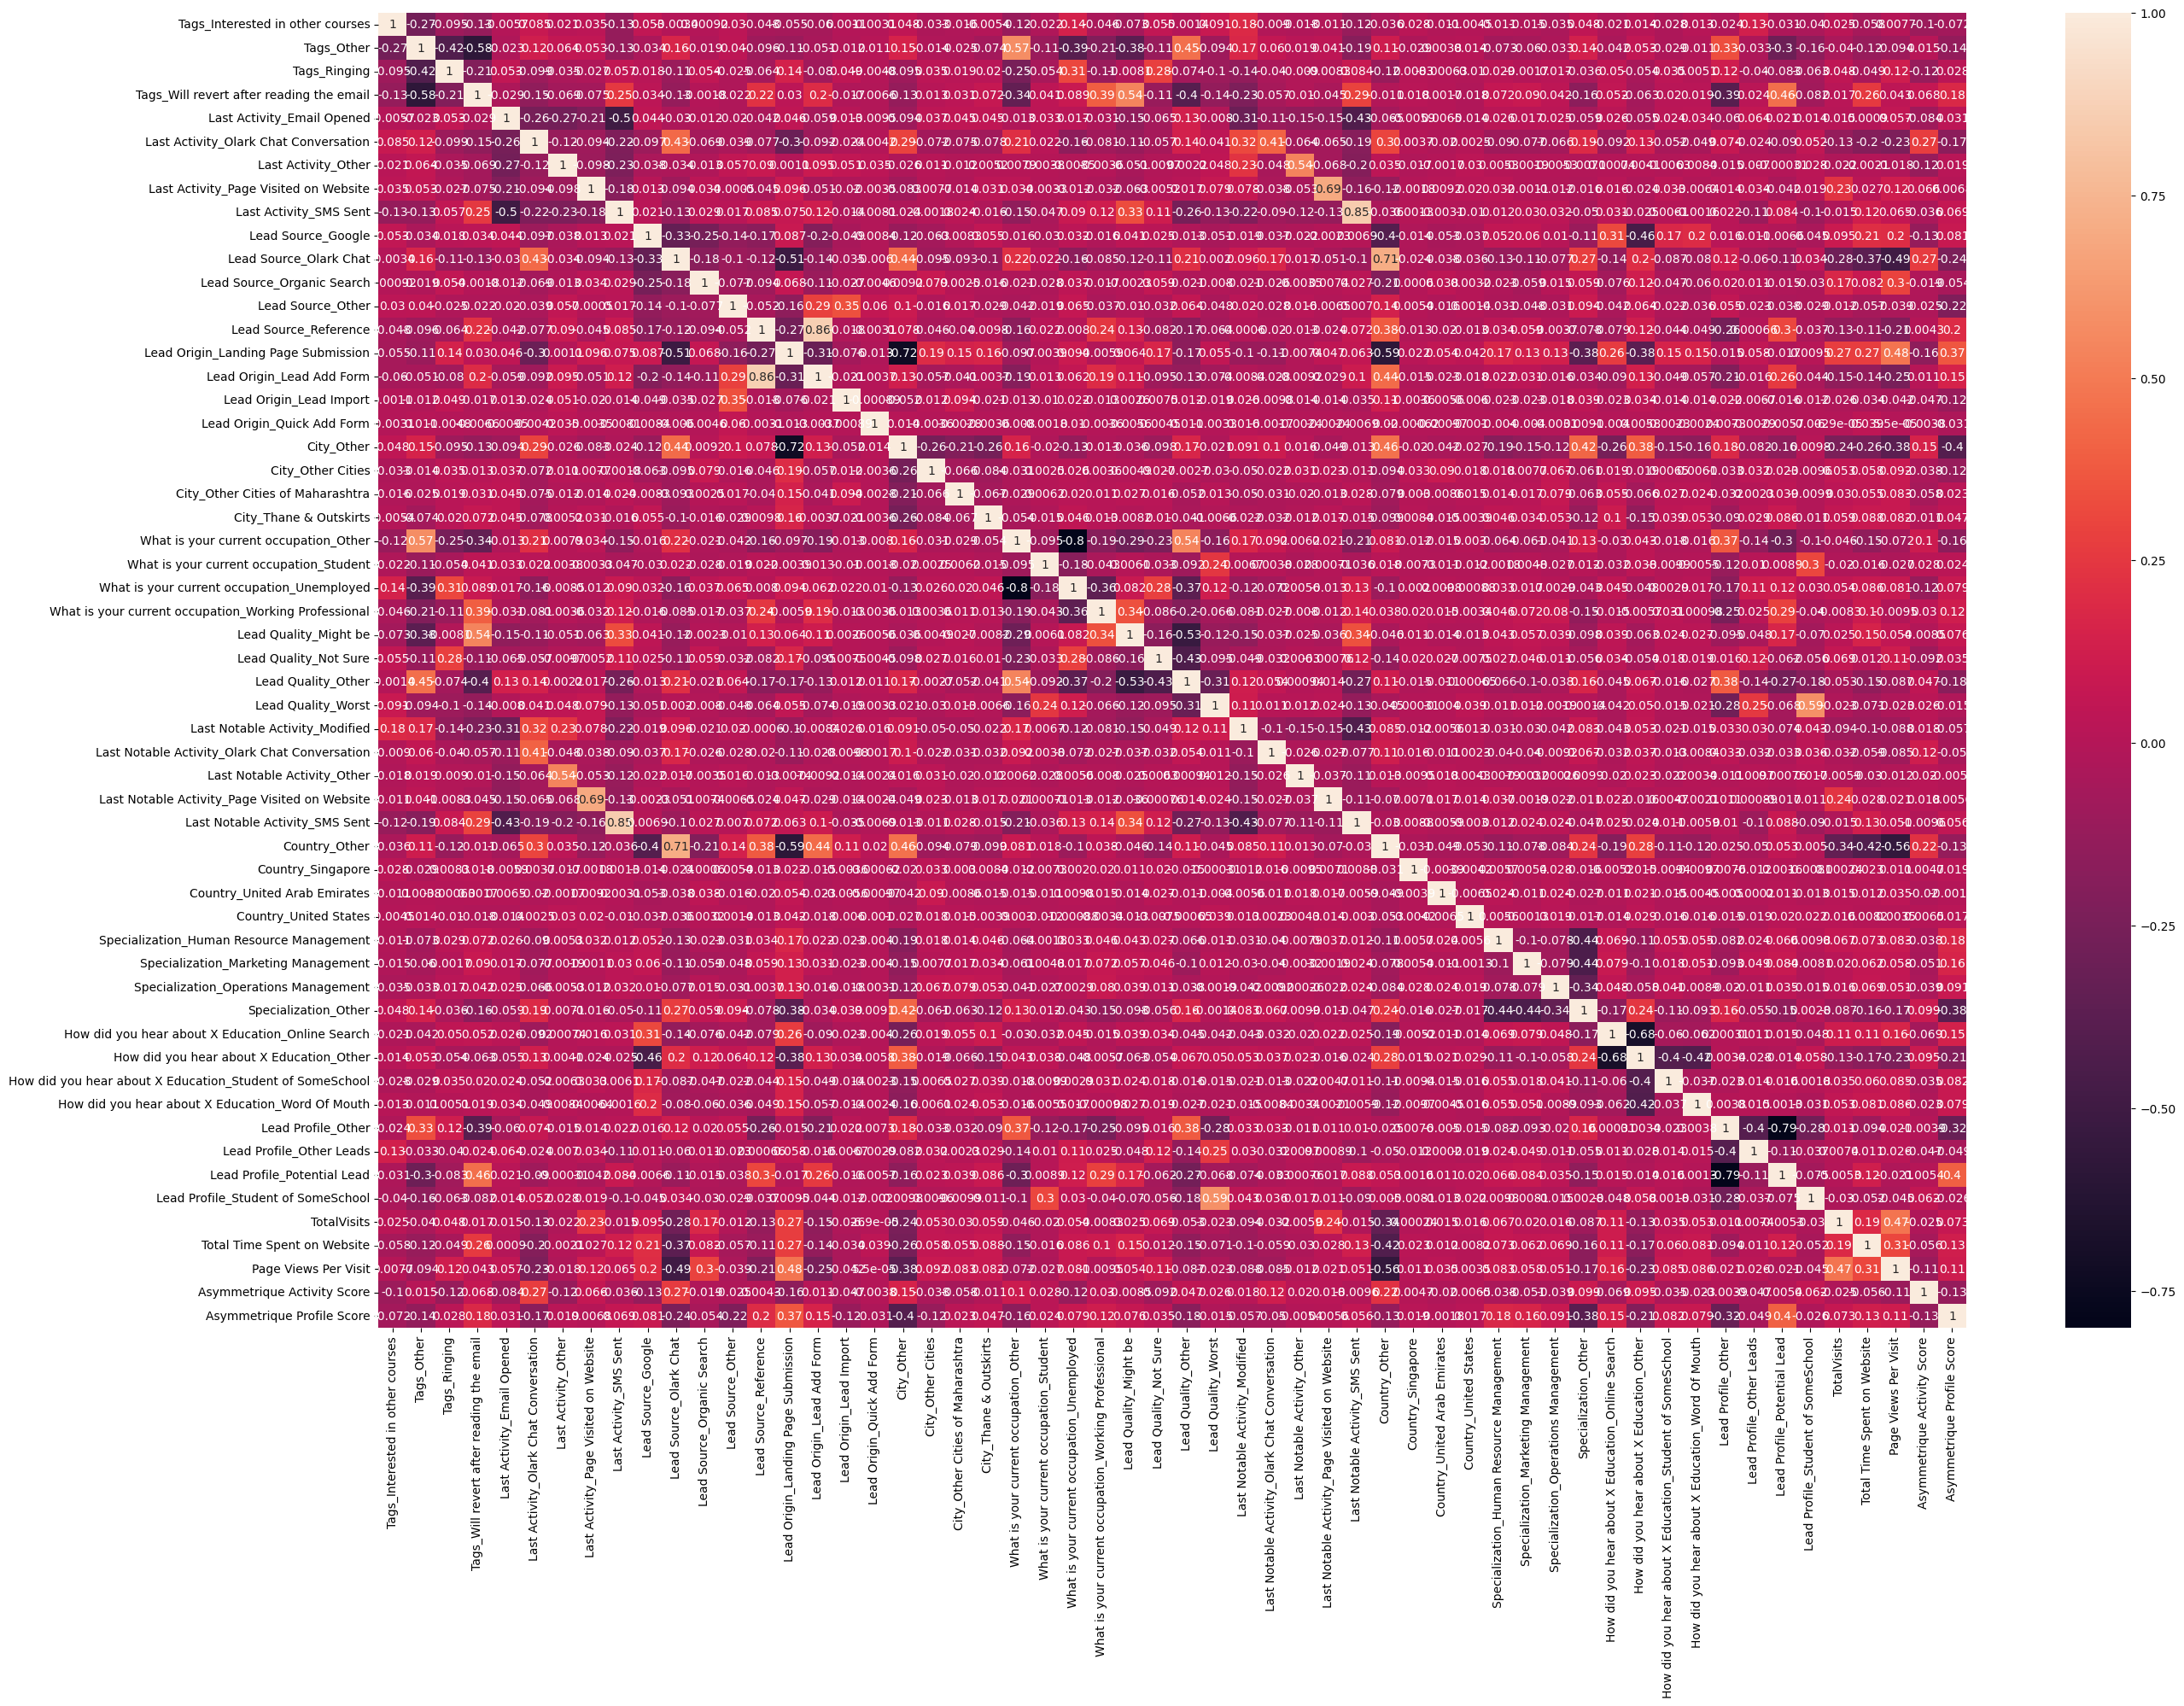

In [89]:
# Analysis high colleration by heatmap matrix
plt.figure(figsize = (30,20))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [90]:
# Find the variables having high colleration with one another >= 70%
# Create a correlation matrix
correlation_matrix = X_train.corr()

# Find pairs of variables with correlation >= 0.6
high_correlation_pairs = (correlation_matrix.abs() >= 0.6) & (correlation_matrix < 1)

# Extract variable names with high correlation
high_correlation_variables = []

for col in high_correlation_pairs.columns:
    correlated_vars = high_correlation_pairs.index[high_correlation_pairs[col]].tolist()
    if correlated_vars:
        high_correlation_variables.extend([(col, correlated_var) for correlated_var in correlated_vars])

# Display the pairs of variables with high correlation
print("Pairs of variables with correlation >= 0.6:")
for pair in high_correlation_variables:
    print(pair)

Pairs of variables with correlation >= 0.6:
('Last Activity_Page Visited on Website', 'Last Notable Activity_Page Visited on Website')
('Last Activity_SMS Sent', 'Last Notable Activity_SMS Sent')
('Lead Source_Olark Chat', 'Country_Other')
('Lead Source_Reference', 'Lead Origin_Lead Add Form')
('Lead Origin_Landing Page Submission', 'City_Other')
('Lead Origin_Lead Add Form', 'Lead Source_Reference')
('City_Other', 'Lead Origin_Landing Page Submission')
('What is your current occupation_Other', 'What is your current occupation_Unemployed')
('What is your current occupation_Unemployed', 'What is your current occupation_Other')
('Last Notable Activity_Page Visited on Website', 'Last Activity_Page Visited on Website')
('Last Notable Activity_SMS Sent', 'Last Activity_SMS Sent')
('Country_Other', 'Lead Source_Olark Chat')
('How did you hear about X Education_Online Search', 'How did you hear about X Education_Other')
('How did you hear about X Education_Other', 'How did you hear about X Ed

In [91]:
# Remove 1 variable having high colleration with other in X_train
# Identify one variable to remove from each pair
variables_to_remove = set()

for col in high_correlation_pairs.columns:
    correlated_vars = high_correlation_pairs.index[high_correlation_pairs[col]].tolist()
    if correlated_vars:
        # Add the variable with higher index to the removal set
        variables_to_remove.add(max(correlated_vars, key=lambda x: X_train.columns.get_loc(x)))
        
# Drop the identified variables
X_train = X_train.drop(columns=variables_to_remove)

# Display the remaining variables after removal
print("Variables remaining after removing high correlation:")
print(X_train.columns)

Variables remaining after removing high correlation:
Index(['Tags_Interested in other courses', 'Tags_Other', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Other',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Thane & Outskirts', 'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Other',
       'Lead Quality_Worst', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Other', 'Country_Singapore',
       'Country_United Arab Emirates', 'Country_United States',
       'Specialization_Human Resource Managemen

#### Remove high corelation attributes

In [92]:
# Drop the same variables from X_test as removed from X_train
X_test = X_test.drop(columns=variables_to_remove)

In [93]:
X_test.head()

Tags_Interested in other courses  Tags_Other  Tags_Ringing  \
4269                                 0           1             0   
2376                                 0           0             0   
7766                                 0           0             0   
9199                                 0           0             0   
4359                                 0           0             0   

      Tags_Will revert after reading the email  Last Activity_Email Opened  \
4269                                         0                           0   
2376                                         1                           0   
7766                                         1                           0   
9199                                         0                           0   
4359                                         1                           1   

      Last Activity_Olark Chat Conversation  Last Activity_Other  \
4269                                      0                    0   
2376                                      0                    0   
7766                                      0                    1   
9199                                      1                    0   
4359                                      0                    0   

      Lead Source_Google  Lead Source_Organic Search  Lead Source_Other  \
4269                   0                           0                  0   
2376                   0                           0                  0   
7766                   1                           0                  0   
9199                   0                           0                  0   
4359                   0                           0                  0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  City_Other Cities  \
4269                        0                           0                  0   
2376                        0                           0                  0   
7766                        0                           0                  0   
9199                        0                           0                  0   
4359                        0                           0                  0   

      City_Other Cities of Maharashtra  City_Thane & Outskirts  \
4269                                 0                       0   
2376                                 0                       0   
7766                                 0                       1   
9199                                 0                       0   
4359                                 0                       1   

      What is your current occupation_Student  \
4269                                        0   
2376                                        0   
7766                                        0   
9199                                        0   
4359                                        0   

      What is your current occupation_Working Professional  \
4269                                                     0   
2376                                                     0   
7766                                                     1   
9199                                                     0   
4359                                                     0   

      Lead Quality_Might be  Lead Quality_Not Sure  Lead Quality_Other  \
4269                      0                      0                   1   
2376                      0                      0                   1   
7766                      1                      0                   0   
9199                      0                      1                   0   
4359                      0                      0                   1   

      Lead Quality_Worst  Last Notable Activity_Modified  \
4269                   0                               0   
2376                   0                               0   
7766                   0                               0   
9199                   0             

#### Check colleration matrix again

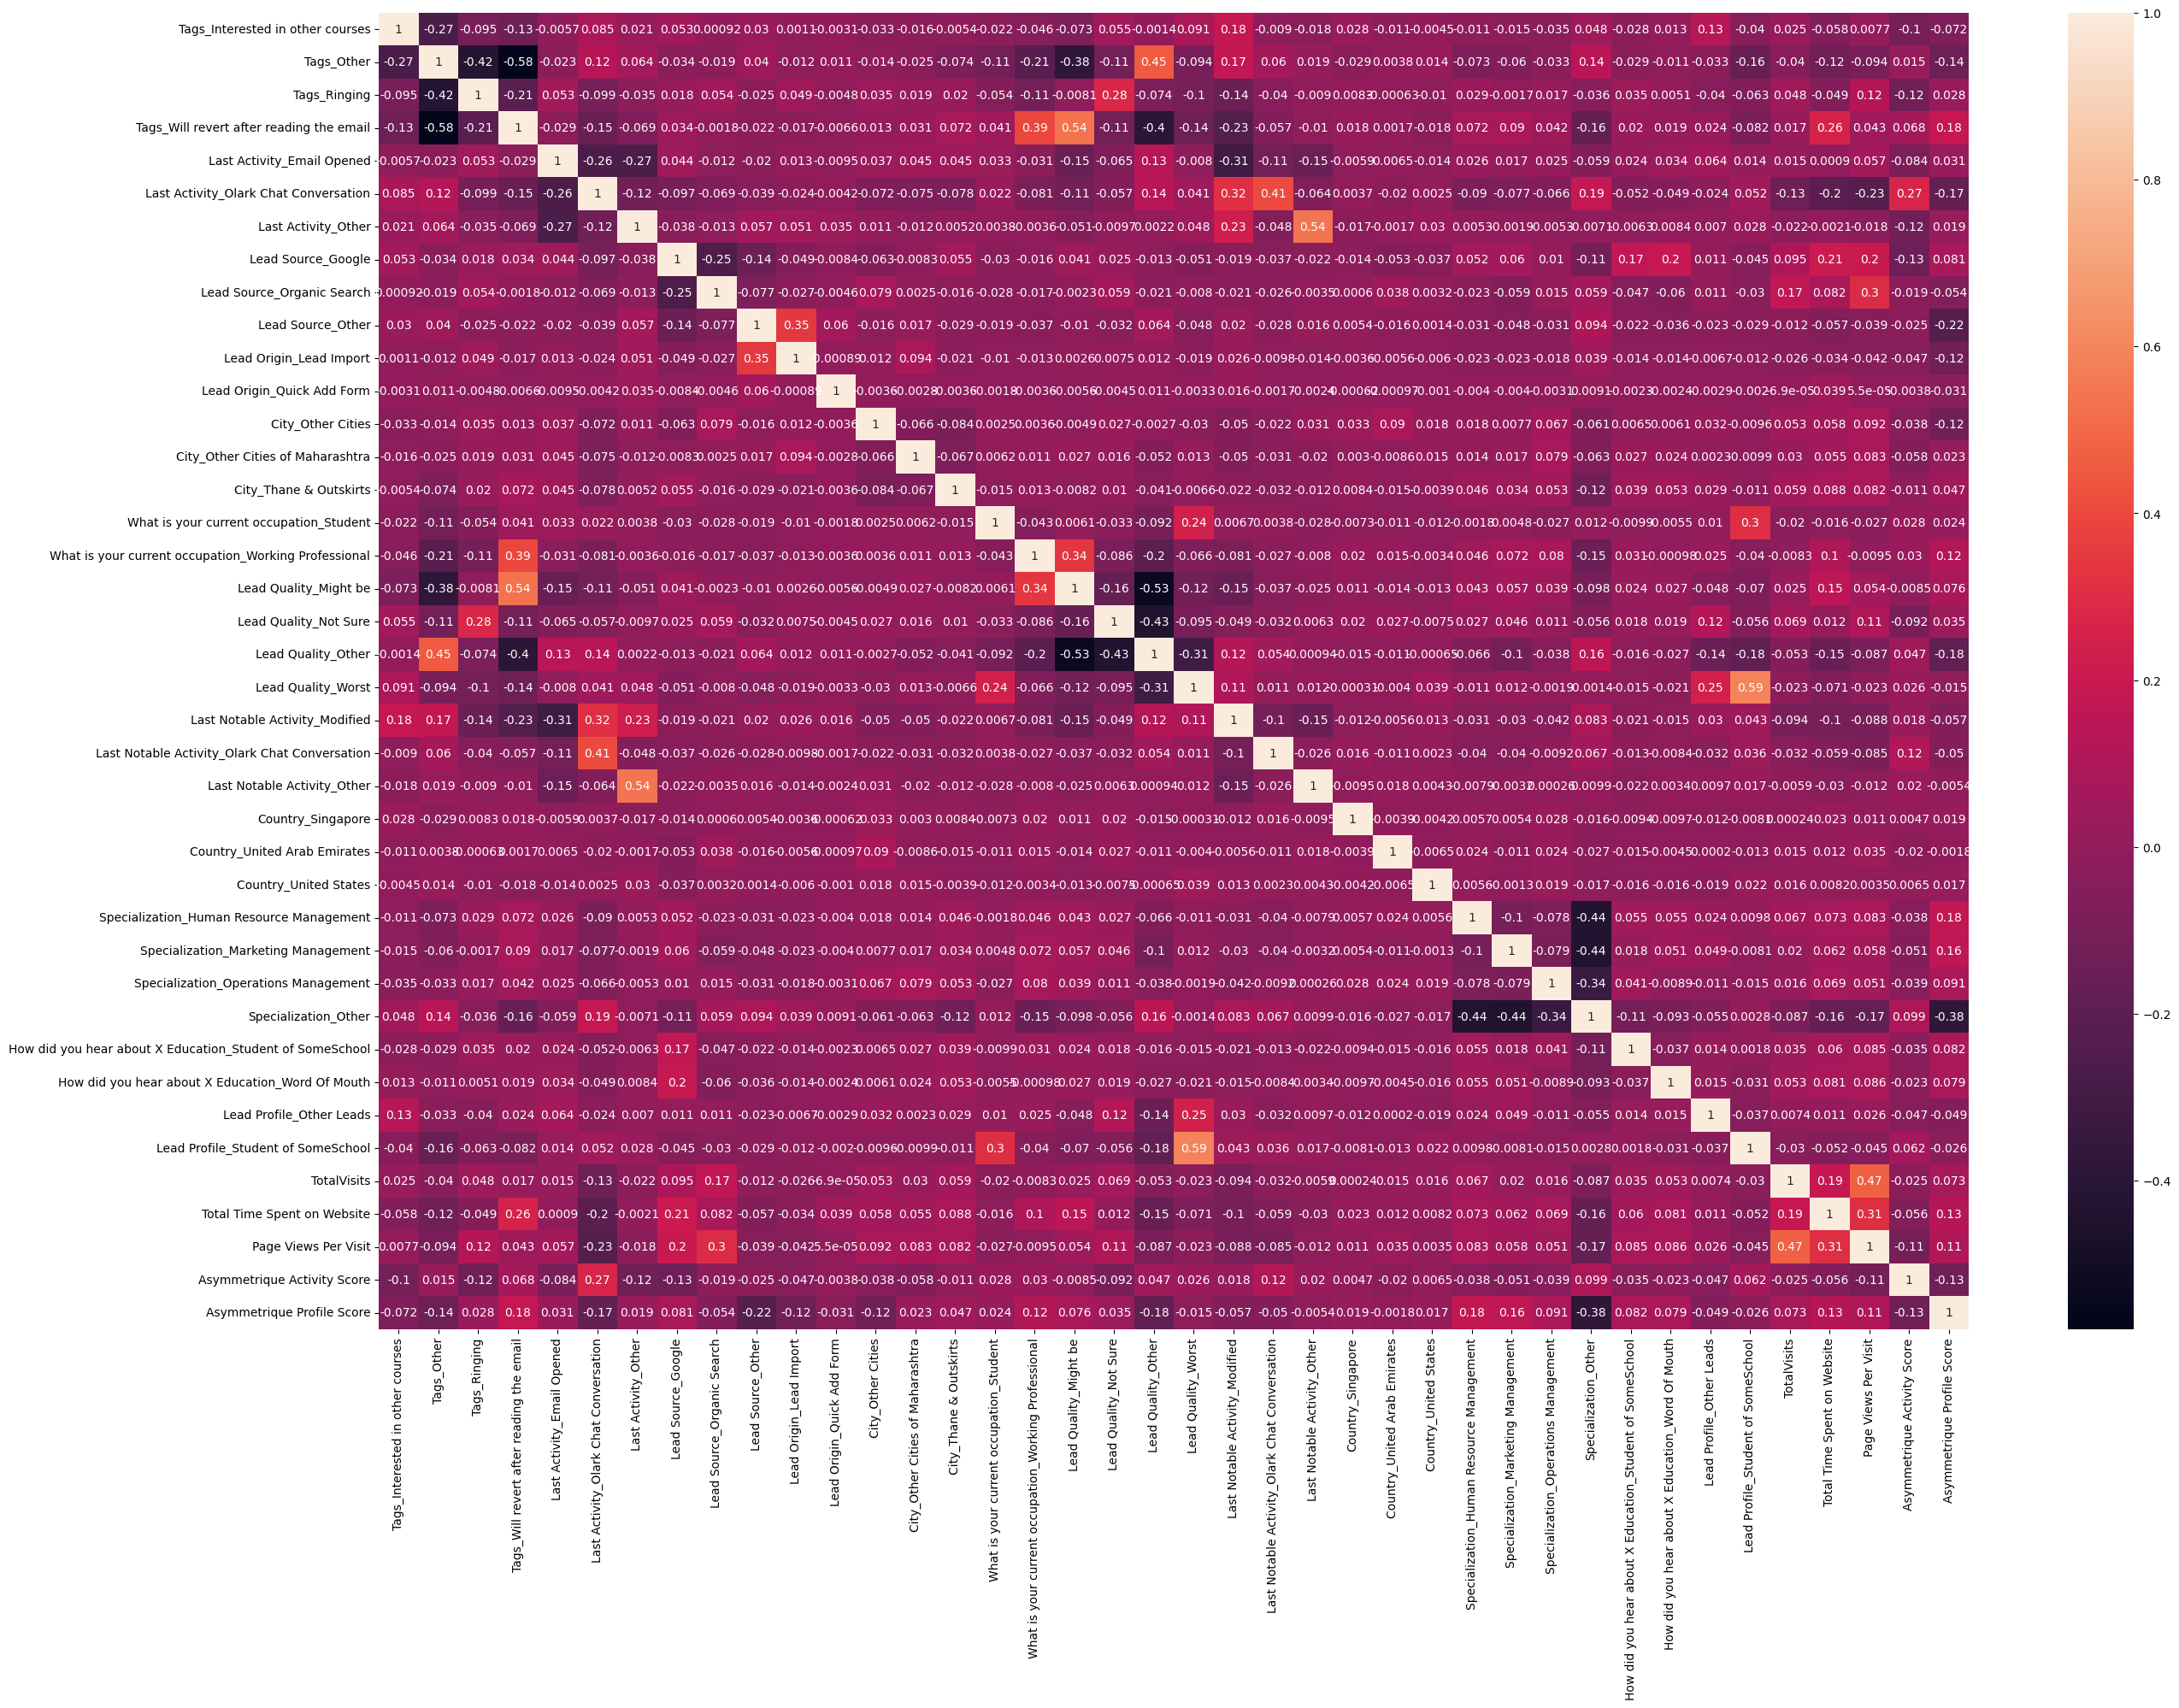

In [94]:
plt.figure(figsize = (30,20))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

## Step 7: Model Building

#### Train Model on X_train

In [95]:
import statsmodels.api as sm

#### First model

In [96]:
# Gọi hàm tạo logistic regression model
logm1 = sm.GLM(y_train,sm.add_constant(X_train), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6427
Model Family:                Binomial   Df Model:                           40
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1756.2
Date:                Wed, 13 Mar 2024   Deviance:                       3512.3
Time:                        03:36:30   Pearson chi2:                 8.91e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.5445
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                      -12.1601      1.457     -8.346      0.000     -15.016      -9.305
Tags_Interested in other courses                             2.2475      0.864      2.600      0.009       0.554       3.941
Tags_Other                                                   4.6365      0.792      5.856      0.000       3.085       6.188
Tags_Ringing                                                 1.6077      0.820      1.961      0.050       0.001       3.214
Tags_Will revert after reading the email                     8.2600      0.813     10.154      0.000       6.666       9.854
Last Activity_Email Opened                                  -0.7518      0.100     -7.516      0.000      -0.948      -0.556
Last Activity_Olark Chat Conversation                       -1.9665      0.242     -8.122      0.000      -2.441      -1.492
Last Activity_Other                                         -0.6682      0.200     -3.348      0.001      -1.059      -0.277
Lead Source_Google                                          -0.0171      0.110     -0.156      0.876      -0.232       0.198
Lead Source_Organic Search                                  -0.0696      0.154     -0.452      0.652      -0.372       0.232
Lead Source_Other                                            2.0453      0.208      9.824      0.000       1.637       2.453
Lead Origin_Lead Import                                     -2.0364      0.736     -2.768      0.006      -3.479      -0.594
Lead Origin_Quick Add Form                                  18.1358   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
City_Other Cities                                           -0.1034      0.173     -0.596      0.551      -0.443       0.237
City_Other Cities of Maharashtra                            -0.0476      0.215     -0.222      0.824      -0.468       0.373
City_Thane & Outskirts                                      -0.2746      0.178     -1.538      0.124      -0.624       0.075
What is your current occupation_Student                     -0.0533      0.436     -0.122      0.903      -0.908       0.801
What is your current occupation_Working Professional         1.5718      0.283      5.554      0.000       1.017       2.127
Lead Quality_Might be                                       -3.1826      0.327     -9.738      0.000      -3.823      -2.542
Lead Quality_Not Sure                                       -3.3682      0.315    -10.708      0.000      -3.985      -2.752
Lead Quality_Other                                          -3.3880      0.286    -11.840      0.000      -3.949      -2.827
Lead Quality_Worst                                          -5.3675      0.498    -

#### Using REF to choose the best attributes

A dataset for classification or regression is comprised of rows and columns. Feature selection is the techniques that select a subset of the most relevant features (columns) for a dataset. Fewer features can allow machine learning algorithms to run more efficiently (less space or time complexity) and be more effective. Some machine learning algorithms can be misled by irrelevant input features, resulting in worse predictive performance.

RFE is a wrapper-type feature selection algorithm. This means that a different machine learning algorithm is given and used in the core of the method, is wrapped by RFE, and used to help select features. It scores each feature and selects those features with the largest (or smallest) score. It could be sorted by model's coef or feature_importances. 

For example, suppose we choose logistic regression as core of model, in the summary table of `logm2`, we could rank features based on coef and choose the best atrributes. If step is set to 15, it means that after each iteration, RFE will eliminate the 15 least important variables and keep the important variables. As we repeat this process, the number of remaining variables will decrease each time until the target number of variables is reached or no variables remain that can be removed without affecting the model's performance. In this case, it remains 20 ones after using ref (5 time recursives)

In [98]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [99]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, step=15)
rfe = rfe.fit(X_train, y_train)

In [100]:
rfe.support_

array([False,  True,  True,  True,  True,  True,  True, False, False,
        True,  True, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True,  True,  True, False])

In [101]:
# Fitest columns
col = X_train.columns[rfe.support_]
print(len(col))
print(col)

20
Index(['Tags_Other', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other', 'Lead Source_Other', 'Lead Origin_Lead Import',
       'What is your current occupation_Working Professional',
       'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Other',
       'Lead Quality_Worst', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Other', 'Lead Profile_Student of SomeSchool',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Asymmetrique Activity Score'],
      dtype='object')


After the first time, there are 20 attributes remain. Howerver, when checking p-value, there's still attributes with p-value > 0.05

#### Try REF again

In [102]:
X_train_1 = X_train[col]

In [103]:
X_train_1_sm = sm.add_constant(X_train_1)
logm2 = sm.GLM(y_train,X_train_1_sm, family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1777.5
Date:                Wed, 13 Mar 2024   Deviance:                       3555.0
Time:                        03:38:28   Pearson chi2:                 9.23e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5415
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -7.0234      0.802     -8.752      0.000      -8.596      -5.451
Tags_Other                                               3.0244      0.323      9.365      0.000       2.391       3.657
Tags_Ringing                                             0.0305      0.385      0.079      0.937      -0.724       0.785
Tags_Will revert after reading the email                 6.6534      0.367     18.121      0.000       5.934       7.373
Last Activity_Email Opened                              -0.7557      0.099     -7.667      0.000      -0.949      -0.563
Last Activity_Olark Chat Conversation                   -2.0128      0.241     -8.353      0.000      -2.485      -1.540
Last Activity_Other                                     -0.6585      0.195     -3.380      0.001      -1.040      -0.277
Lead Source_Other                                        1.8819      0.192      9.809      0.000       1.506       2.258
Lead Origin_Lead Import                                 -2.2845      0.727     -3.143      0.002      -3.709      -0.860
What is your current occupation_Working Professional     1.6643      0.277      6.013      0.000       1.122       2.207
Lead Quality_Might be                                   -3.2836      0.324    -10.140      0.000      -3.918      -2.649
Lead Quality_Not Sure                                   -3.4614      0.311    -11.136      0.000      -4.071      -2.852
Lead Quality_Other                                      -3.5241      0.284    -12.422      0.000      -4.080      -2.968
Lead Quality_Worst                                      -5.4996      0.484    -11.363      0.000      -6.448      -4.551
Last Notable Activity_Modified                          -1.0663      0.110     -9.689      0.000      -1.282      -0.851
Last Notable Activity_Olark Chat Conversation           -0.7511      0.429     -1.751      0.080      -1.592       0.090
Last Notable Activity_Other                             -0.8864      0.308     -2.877      0.004      -1.490      -0.282
Lead Profile_Student of SomeSchool                       1.1871      0.703      1.688      0.091      -0.191       2.565
Total Time Spent on Website                              0.9575      0.048     20.123      0.000       0.864       1.051
Page Views Per Visit                                    -0.4800      0.054     -8.888      0.000      -0.586      -0.374
Asymmetrique Activity Score                              0.5105      0.049     10.521      0.000       0.415       0.606
========================================================================================================================
"""

Continue using FRE to remove attribute. After the second time, the number of atributes is 10.

In [104]:
rfe = rfe.fit(X_train_1, y_train)
col = X_train_1.columns[rfe.support_]
print(len(col))
print(col)

10
Index(['Tags_Other', 'Tags_Will revert after reading the email',
       'Last Activity_Olark Chat Conversation', 'Lead Source_Other',
       'Lead Origin_Lead Import',
       'What is your current occupation_Working Professional',
       'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Other',
       'Lead Quality_Worst'],
      dtype='object')


In [105]:
X_train_2 = X_train_1[col]
X_train_2_sm=sm.add_constant(X_train_2)
logm3 = sm.GLM(y_train,X_train_2_sm, family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2182.6
Date:                Wed, 13 Mar 2024   Deviance:                       4365.2
Time:                        03:39:18   Pearson chi2:                 7.49e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4803
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7778      0.294     -2.649      0.008      -1.353      -0.202
Tags_Other                                               2.8256      0.177     15.995      0.000       2.479       3.172
Tags_Will revert after reading the email                 6.4894      0.236     27.460      0.000       6.026       6.953
Last Activity_Olark Chat Conversation                   -1.7361      0.177     -9.782      0.000      -2.084      -1.388
Lead Source_Other                                        1.4421      0.167      8.626      0.000       1.114       1.770
Lead Origin_Lead Import                                 -2.3192      0.675     -3.436      0.001      -3.642      -0.996
What is your current occupation_Working Professional     1.4751      0.246      5.992      0.000       0.993       1.958
Lead Quality_Might be                                   -2.5725      0.287     -8.977      0.000      -3.134      -2.011
Lead Quality_Not Sure                                   -2.7995      0.274    -10.204      0.000      -3.337      -2.262
Lead Quality_Other                                      -2.9774      0.254    -11.737      0.000      -3.475      -2.480
Lead Quality_Worst                                      -4.8594      0.417    -11.653      0.000      -5.677      -4.042
========================================================================================================================
"""

There no p-value >0.05 so we could use it as last model

##### Predict on train set

In [115]:
model = logm3.fit()
y_train_pred = model.predict(X_train_2_sm)

In [116]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID
1871         0        0.027191         1871
6795         0        0.283014         6795
3516         0        0.022862         3516
8105         0        0.033888         8105
3934         0        0.283014         3934

Vì đường cong logistic chỉ cung cấp các xác suất chứ không cung cấp phân loại thực tế là 'Churn' và 'No Churn', nên cần tìm một ngưỡng xác suất để phân loại khách hàng là 'Churn' và 'No Churn'. Ở đây, chọn 0,5 làm mức giới hạn tùy ý, trong đó nếu xác suất một khách hàng cụ thể có xác suất nhỏ hơn 0,5 thì sẽ phân loại nó là 'churn' và nếu nó lớn hơn 0,5, sẽ phân loại nó là 'No Churn' . Việc lựa chọn 0,5 là hoàn toàn tùy ý ở giai đoạn này và ta sẽ tìm hiểu cách tìm ngưỡng tối ưu trong 'Đánh giá mô hình'.

In [117]:
y_train_pred_final['predicted'] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.8 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  predicted
1871         0        0.027191         1871          0
6795         0        0.283014         6795          0
3516         0        0.022862         3516          0
8105         0        0.033888         8105          0
3934         0        0.283014         3934          0

#### Wvaluation

In [110]:
from sklearn import metrics

In [120]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
print(confusion)

[[3949   53]
 [ 934 1532]]


In [121]:
# Độ chính xác của mô hình
print(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted']))

0.8474025974025974


In [122]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [123]:
# Sensitivity
TP / float(TP+FN)

0.6212489862124899

In [124]:
# Specificity
TN / float(TN+FP)

0.9867566216891555

In [125]:
# false postive rate
print(FP/ float(TN+FP))

0.013243378310844578


In [126]:
# positive predictive value 
print (TP / float(TP+FP))

0.9665615141955836


In [127]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8087241449928323


### ROC Curve

In [128]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [134]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

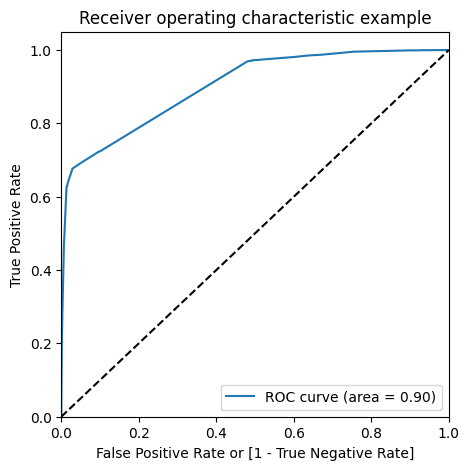

In [135]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### The cut off

In [137]:
# tạo các cột có giới hạn xác suất khác nhau
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  \
1871         0        0.027191         1871          0    1    0    0    0   
6795         0        0.283014         6795          0    1    1    1    0   
3516         0        0.022862         3516          0    1    0    0    0   
8105         0        0.033888         8105          0    1    0    0    0   
3934         0        0.283014         3934          0    1    1    1    0   

      0.4  0.5  0.6  0.7  0.8  0.9  
1871    0    0    0    0    0    0  
6795    0    0    0    0    0    0  
3516    0    0    0    0    0    0  
8105    0    0    0    0    0    0  
3934    0    0    0    0    0    0

In [140]:
# Tính toán accuracy sensitivity and specificity cho từng điểm giớ hạn xác suất
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.685374  0.970397  0.509745
0.2   0.2  0.690631  0.969181  0.518991
0.3   0.3  0.833024  0.723439  0.900550
0.4   0.4  0.858844  0.676805  0.971014
0.5   0.5  0.858844  0.676805  0.971014
0.6   0.6  0.858689  0.675994  0.971264
0.7   0.7  0.849567  0.628954  0.985507
0.8   0.8  0.847403  0.621249  0.986757
0.9   0.9  0.830550  0.573804  0.988756


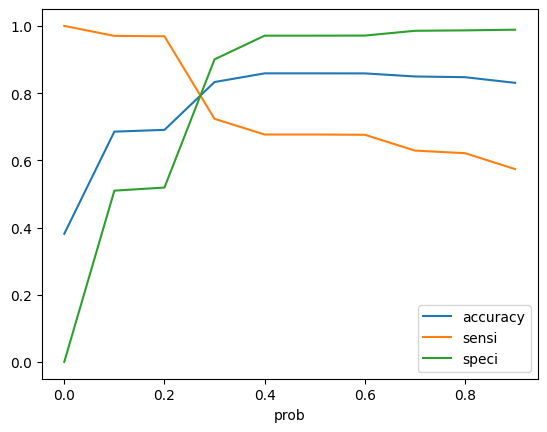

In [141]:
# Biểu diễn các đường accuracy sensitivity and specificity
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

####  As we can see, 0.3 is the cut-off we could choose.

In [164]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  \
1871         0        0.027191         1871          0    1    0    0    0   
6795         0        0.283014         6795          0    1    1    1    0   
3516         0        0.022862         3516          0    1    0    0    0   
8105         0        0.033888         8105          0    1    0    0    0   
3934         0        0.283014         3934          0    1    1    1    0   

      0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  
1871    0    0    0    0    0    0                0  
6795    0    0    0    0    0    0                0  
3516    0    0    0    0    0    0                0  
8105    0    0    0    0    0    0                0  
3934    0    0    0    0    0    0                0

Check all evaluation metric again

In [165]:

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8330241187384044

In [166]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3604,  398],
       [ 682, 1784]])

In [167]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [168]:
# sensitivity
TP / float(TP+FN)

0.7234387672343877

In [169]:
# specificity
TN / float(TN+FP)

0.9005497251374313

In [170]:
# false postive rate 
print(FP/ float(TN+FP))

0.09945027486256872


In [171]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8175985334555453


In [172]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8408772748483434


Precision = TP / TP + FP

In [175]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9665615141955836

Recall = TP / TP + FN

In [176]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6212489862124899

### Predcit on test set

In [177]:
X_test = X_test[col]
X_test.head()

Tags_Other  Tags_Will revert after reading the email  \
4269           1                                         0   
2376           0                                         1   
7766           0                                         1   
9199           0                                         0   
4359           0                                         1   

      Last Activity_Olark Chat Conversation  Lead Source_Other  \
4269                                      0                  0   
2376                                      0                  0   
7766                                      0                  0   
9199                                      1                  0   
4359                                      0                  0   

      Lead Origin_Lead Import  \
4269                        0   
2376                        0   
7766                        0   
9199                        0   
4359                        0   

      What is your current occupation_Working Professional  \
4269                                                     0   
2376                                                     0   
7766                                                     1   
9199                                                     0   
4359                                                     0   

      Lead Quality_Might be  Lead Quality_Not Sure  Lead Quality_Other  \
4269                      0                      0                   1   
2376                      0                      0                   1   
7766                      1                      0                   0   
9199                      0                      1                   0   
4359                      0                      0                   1   

      Lead Quality_Worst  
4269                   0  
2376                   0  
7766                   0  
9199                   0  
4359                   0

In [178]:
X_test_sm = sm.add_constant(X_test)

In [179]:
y_test_pred = model.predict(X_test_sm)

In [181]:
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_Prob':y_test_pred})
y_test_pred_final['Prospect ID'] = y_test.index
y_test_pred_final.head()

Converted  Converted_Prob  Prospect ID
4269         1        0.283014         4269
2376         1        0.939019         2376
7766         1        0.990188         7766
9199         0        0.004901         9199
4359         1        0.939019         4359

In [182]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [183]:
# Kiêm tra lại các chỉ số đánh giá
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)

0.8437950937950938

In [184]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_predicted)
confusion2

array([[1518,  159],
       [ 274,  821]])

In [185]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [186]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7497716894977169

In [187]:
# Let us calculate specificity
TN / float(TN+FP)

0.9051878354203936